# Análisis Exploratorio de Datos (EDA) 

Para organizar el archivo, se van a seguir los pasos del indíce para estudiar la naturalezade los datos:

- [Importaciones y librerías](#importaciones-y-librerías)
  - [Diccionario Variables](#diccionario-variables)
- [1. Exploración Inicial](#1-exploración-inicial)
- [2. Tratamiento Nulos y Duplicados](#2-tratamiento-nulos-y-duplicados)
  - [2.1 Eliminación Columnas](#21-eliminación-columnas)
- [3. Clasificación de variables por tipo](#3-clasificación-de-variables-por-tipo)
  - [3.1 Variables Binarias](#31-variables-binarias)
  - [3.2 Variables Numéricas](#32-variables-numéricas)
  - [3.3 Variables Categóricas](#33-variables-categóricas)
- [CSV final](#csv-final)

## Importaciones y librerías

In [1]:
# Librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import country_converter as coco #libreria continentes
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [2]:
# Importación tabla final
df=pd.read_csv('../data/processed/merge.csv')
df

,paciente_id,edad,sexo,estado_civil,nivel_educativo,ocupacion,region,pais_nacimiento,codigo_postal,fumador,...,mut_KRAS,mut_PIK3CA,mut_ALK,mut_BRAF,ingresos_mensuales,gastos_salud,seguro_salud,deudas,tipo_empleo,ayudas_publicas
0,P1000000,69,F,Viudo,Secundaria,Empleado,Centro,Indonesia,98471,1,...,0,0,0,1,"2699,72",450,1,0,Público,1
1,P1000001,32,M,Soltero,Universitaria,Autónomo,Sur,Brazil,23903,0,...,0,0,0,1,"3403,55",150,1,0,Temporal,1
2,P1000002,89,M,Viudo,Primaria,Desempleado,Norte,Saint Pierre and Miquelon,20094,1,...,0,0,0,0,"2422,41",150,1,0,Desempleado,1
3,P1000003,78,M,Viudo,Secundaria,Autónomo,Centro,Indonesia,55575,1,...,1,0,0,0,"1695,42",450,1,0,Temporal,1
4,P1000004,38,F,Soltero,Posgrado,Autónomo,Norte,Chile,20826,1,...,0,0,0,0,"1709,51",150,1,0,Temporal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,P1049995,21,M,Casado,Universitaria,Desempleado,Sur,Estonia,8356,0,...,0,0,0,0,"2735,81",150,1,0,Temporal,1
49996,P1049996,35,F,Casado,Posgrado,Empleado,Oeste,Albania,2946,0,...,0,0,0,0,"1972,11",250,1,0,Público,1
49997,P1049997,46,M,Divorciado,Secundaria,Jubilado,Norte,Austria,89529,0,...,1,0,0,1,"1508,07",150,1,0,Desempleado,1
49998,P1049998,56,M,Soltero,Posgrado,Jubilado,Centro,Saudi Arabia,13708,1,...,0,0,0,0,"949,77",250,1,1,Desempleado,1


In [3]:
df.columns

Index(['paciente_id', 'edad', 'sexo', 'estado_civil', 'nivel_educativo',
       'ocupacion', 'region', 'pais_nacimiento', 'codigo_postal', 'fumador',
       'alcohol', 'actividad_fisica', 'vive', 'diabetes', 'hipertension',
       'obesidad', 'cancer', 'enfermedad_cardiaca', 'asma', 'epoc', 'glucosa',
       'colesterol', 'trigliceridos', 'hemoglobina', 'leucocitos', 'plaquetas',
       'creatinina', 'mut_BRCA1', 'mut_TP53', 'mut_EGFR', 'mut_KRAS',
       'mut_PIK3CA', 'mut_ALK', 'mut_BRAF', 'ingresos_mensuales',
       'gastos_salud', 'seguro_salud', 'deudas', 'tipo_empleo',
       'ayudas_publicas'],
      dtype='object')

### Diccionario Variables



| Categoría               | Variables                                           | Tabla origen     |
|------------------------|-----------------------------------------------------|------------------|
| Sociales / Demográficas | edad, sexo, estado_civil, nivel_educativo, ocupacion | sociodemo        |
| Geográficas             | region, pais_nacimiento, codigo_postal              | sociodemo        |
| Genéticas               | mut_BRCA1, mut_TP53, mut_EGFR, mut_KRAS, mut_PIK3CA, mut_ALK, mut_BRAF | geneticos        |
| Bioquímicas             | glucosa, colesterol, trigliceridos, hemoglobina, leucocitos, plaquetas, creatinina | bioquimicos      |
| Clínicas                | diabetes, hipertension, obesidad, cancer, enfermedad_cardiaca, asma, epoc | clinicos         |
| Estilo de vida          | fumador, alcohol, actividad_fisica                  | general          |
| Económicas              | ingresos_mensuales, gastos_salud, seguro_salud, deudas, tipo_empleo, ayudas_publicas | economicos       |
| Variable objetivo       | vive                                                | general          |

## 1. Exploración Inicial

**Dimensiones**

In [4]:
# Mostrar dimensiones
print(f"Número de filas: {df.shape[0]}")
print(f"Número de columnas: {df.shape[1]}")

Número de filas: 50000
Número de columnas: 40


**Tipos de Variables**

In [5]:
print("\nInformación general:")
print(df.info())


Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   paciente_id          50000 non-null  object
 1   edad                 50000 non-null  int64 
 2   sexo                 50000 non-null  object
 3   estado_civil         50000 non-null  object
 4   nivel_educativo      50000 non-null  object
 5   ocupacion            50000 non-null  object
 6   region               50000 non-null  object
 7   pais_nacimiento      50000 non-null  object
 8   codigo_postal        50000 non-null  int64 
 9   fumador              50000 non-null  int64 
 10  alcohol              50000 non-null  int64 
 11  actividad_fisica     50000 non-null  object
 12  vive                 50000 non-null  int64 
 13  diabetes             50000 non-null  int64 
 14  hipertension         50000 non-null  int64 
 15  obesidad             50000 non-

**Estadísitcas**

In [6]:
print("\nResumen estadístico:")
df.describe(include='number')


Resumen estadístico:


,edad,codigo_postal,fumador,alcohol,vive,diabetes,hipertension,obesidad,cancer,enfermedad_cardiaca,...,mut_TP53,mut_EGFR,mut_KRAS,mut_PIK3CA,mut_ALK,mut_BRAF,gastos_salud,seguro_salud,deudas,ayudas_publicas
count,50000.000000,50000.00000,50000.000000,50000.0,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.000000,50000.0
mean,53.398700,50001.09824,0.364360,1.0,0.871680,0.212540,0.262800,0.368300,0.118140,0.194140,...,0.099860,0.102120,0.100500,0.101340,0.103380,0.100300,228.762000,1.0,0.192720,1.0
std,20.799006,28692.22255,0.481255,0.0,0.334449,0.409109,0.440159,0.482348,0.322777,0.395541,...,0.299816,0.302809,0.300669,0.301781,0.304458,0.300403,88.941023,0.0,0.394439,0.0
min,18.000000,501.00000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,1.0,0.000000,1.0
25%,35.000000,25049.75000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,1.0,0.000000,1.0
50%,53.000000,49844.00000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,250.000000,1.0,0.000000,1.0
75%,71.000000,74866.25000,1.000000,1.0,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,250.000000,1.0,0.000000,1.0
max,89.000000,99943.00000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,550.000000,1.0,1.000000,1.0


In [7]:
print("\nResumen de variables categóricas:")
df.describe(include='object')


Resumen de variables categóricas:


,paciente_id,sexo,estado_civil,nivel_educativo,ocupacion,region,pais_nacimiento,actividad_fisica,glucosa,colesterol,trigliceridos,hemoglobina,leucocitos,plaquetas,creatinina,ingresos_mensuales,tipo_empleo
count,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000
unique,50000,2,4,4,4,5,243,3,6474,11682,11792,683,675,15953,164,44329,5
top,P1000000,F,Casado,Secundaria,Jubilado,Centro,Congo,Moderada,"94,14","190,64","146,08","13,78","6,91","248,58","1,06",300,Desempleado
freq,1,25086,12628,12638,12568,10094,439,20821,33,20,19,233,234,15,969,940,10065


## 2. Tratamiento Nulos y Duplicados

**Nulos**

In [8]:
print("Número de valores nulos por columna:")
display(df.isnull().sum().sort_values(ascending=False))

Número de valores nulos por columna:


paciente_id            0
edad                   0
trigliceridos          0
hemoglobina            0
leucocitos             0
plaquetas              0
creatinina             0
mut_BRCA1              0
mut_TP53               0
mut_EGFR               0
mut_KRAS               0
mut_PIK3CA             0
mut_ALK                0
mut_BRAF               0
ingresos_mensuales     0
gastos_salud           0
seguro_salud           0
deudas                 0
tipo_empleo            0
colesterol             0
glucosa                0
epoc                   0
fumador                0
sexo                   0
estado_civil           0
nivel_educativo        0
ocupacion              0
region                 0
pais_nacimiento        0
codigo_postal          0
alcohol                0
asma                   0
actividad_fisica       0
vive                   0
diabetes               0
hipertension           0
obesidad               0
cancer                 0
enfermedad_cardiaca    0
ayudas_publicas        0


**Duplicados**

In [9]:
#Duplicados
print(f"\nNúmero de filas duplicadas: {df.duplicated().sum()}")


Número de filas duplicadas: 0


### 2.1 Eliminación Columnas

Se eliminan las siguientes columnas de cara al entrenamiento de la red:

| Columna           | Motivo de eliminación                                     |
|-------------------|-----------------------------------------------------------|
| `paciente_id`     | Identificador único, no aporta información al modelo      |
| `codigo_postal`   | Demasiadas categorías únicas, difícil de codificar        |
| `alcohol`         | Todos los valores son 1                                   |
| `seguro_salud`    | Todos los valores son 1                                   |
| `asma`            | Todos los valores son 0                                   |
| `ayudas_publicas` | Todos los valores son 1                                   |

In [10]:
columnas_a_eliminar = ['paciente_id', 'codigo_postal', 'alcohol', 'seguro_salud', 'asma', 'ayudas_publicas']
df = df.drop(columns=columnas_a_eliminar)

## 3.Clasificación de variables por tipo

Se detectan y agrupan automáticamente las variables del dataset en tres tipos principales:
- **Binarias**: variables ya codificadas como 0 y 1.
- **Categóricas**: variables con valores no numéricos o con pocas categorías.
- **Numéricas**: variables continuas o discretas que pueden requerir estandarización.

Esta clasificación permite aplicar transformaciones específicas en el preprocesamiento posterior


In [11]:
# Binarias
variables_binarias = [
    col for col in df.columns
    if df[col].dropna().isin([0, 1]).all() and df[col].nunique() <= 2
]

# Numéricas (excluyendo pais_nacimiento si está como object con muchos valores únicos)
variables_numericas = [
    col for col in df.columns
    if (
        (df[col].dtype == 'int64' and df[col].nunique() > 2)
        or (df[col].dtype == 'object' and df[col].nunique() > 5)
    ) and col != 'pais_nacimiento'
]

# Categóricas
variables_categoricas = [
    col for col in df.columns
    if col not in variables_binarias + variables_numericas
]

In [12]:
print("Variables binarias:")
print(variables_binarias)

print("\nVariables categóricas:")
print(variables_categoricas)

print("\nVariables numéricas:")
print(variables_numericas)

Variables binarias:
['fumador', 'vive', 'diabetes', 'hipertension', 'obesidad', 'cancer', 'enfermedad_cardiaca', 'epoc', 'mut_BRCA1', 'mut_TP53', 'mut_EGFR', 'mut_KRAS', 'mut_PIK3CA', 'mut_ALK', 'mut_BRAF', 'deudas']

Variables categóricas:
['sexo', 'estado_civil', 'nivel_educativo', 'ocupacion', 'region', 'pais_nacimiento', 'actividad_fisica', 'tipo_empleo']

Variables numéricas:
['edad', 'glucosa', 'colesterol', 'trigliceridos', 'hemoglobina', 'leucocitos', 'plaquetas', 'creatinina', 'ingresos_mensuales', 'gastos_salud']


### 3.1 Variables Binarias

In [13]:
df[variables_binarias].head()  

,fumador,vive,diabetes,hipertension,obesidad,cancer,enfermedad_cardiaca,epoc,mut_BRCA1,mut_TP53,mut_EGFR,mut_KRAS,mut_PIK3CA,mut_ALK,mut_BRAF,deudas
0,1,1,1,1,1,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1,0,1,0,1,1,1,0,0,0,0,1,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Desbalanceo

In [14]:
# Variables predictorias
variables_binarias_sin_vive = [col for col in variables_binarias if col != 'vive']
porcentajes = []

for col in variables_binarias_sin_vive:
    total = len(df)
    porcentaje_0 = (df[col] == 0).sum() / total * 100
    porcentaje_1 = (df[col] == 1).sum() / total * 100
    porcentajes.append((col, porcentaje_0, porcentaje_1))


porcentajes_df = pd.DataFrame(porcentajes, columns=['Variable', '% de 0', '% de 1'])
porcentajes_df

,Variable,% de 0,% de 1
0,fumador,63.564,36.436
1,diabetes,78.746,21.254
2,hipertension,73.720,26.280
3,obesidad,63.170,36.830
4,cancer,88.186,11.814
5,enfermedad_cardiaca,80.586,19.414
6,epoc,96.378,3.622
7,mut_BRCA1,90.106,9.894
8,mut_TP53,90.014,9.986
9,mut_EGFR,89.788,10.212


#### Variable Vive

La variable objetivo `vive` está desbalanceada, con aproximadamente un 87% de pacientes que sobreviven (`vive = 1`) y solo un 13% que no sobreviven (`vive = 0`).  
Este desbalance puede provocar que el modelo tienda a predecir siempre la clase mayoritaria, ignorando la minoritaria.

Objetivo: **detectar correctamente a los pacientes que no sobrevivirán**.  
Es decir, **evitar predecir erróneamente que un paciente sobrevivirá cuando no lo hará**.

Esto se traduce en el siguiente escenario dentro de la matriz de confusión:

|                | Predicho: 0 | Predicho: 1 |
|----------------|-------------|-------------|
| Real: 0        |  TN| ❌ **FN**  |
| Real: 1        |  FP            | TP |

El caso que más nos preocupa es el **falso negativo**, ya que implica que el modelo afirma que un paciente va a sobrevivir, cuando en realidad no lo hará.


In [15]:
#variable objetivo
df['vive'].value_counts(normalize=True) * 100

vive
1    87.168
0    12.832
Name: proportion, dtype: float64

**¿Cómo abordarlo?**

- Usar métricas como **`recall` de la clase 0** y el **`f1-score`** en lugar del `accuracy`, ya que penalizan mejor los errores sobre la clase minoritaria.
- Si el modelo no está funcionando bien en ese sentido, se puede **asignar más peso a la clase 0** durante el entrenamiento usando `class_weight`, lo que forzará al modelo a prestar más atención a esos casos.

#### Comparación Tasa Supervivencia

Se calcula, para cada variable binaria el **porcentaje de pacientes que sobrevivieron**en función de los dos posibles valores que puede tomar esa variable (0 o 1).

Por ejemplo:
- En la variable fumador, se analiza:
  - ¿Qué porcentaje de los no fumadores (fumador = 0) sobrevivió?
  - ¿Qué porcentaje de los fumadores (fumador = 1) sobrevivió?

Esto permite comparar si los pacientes que **presentan una determinada condición** (valor 1 en la variable) tienen una **mayor o menor tasa de supervivencia** en comparación con aquellos que **no presentan esa condición** (valor 0).

In [16]:
#indentificar mutaciones
mutaciones = [col for col in variables_binarias if col.startswith('mut_')]
binarias_sin_mutaciones = [col for col in variables_binarias if col not in mutaciones and col != 'vive']


##### Binarias

In [17]:
porcentajes = {}

for col in binarias_sin_mutaciones:
    total_por_valor = df[col].value_counts().reindex([0, 1], fill_value=0)
    vive_por_valor = df[df['vive'] == 1][col].value_counts().reindex([0, 1], fill_value=0)

    porcentaje = (vive_por_valor / total_por_valor * 100).fillna(0)
    porcentajes[col] = porcentaje


porcentajes_df = pd.DataFrame(porcentajes).T
porcentajes_df.columns = ['% vive (valor = 0)', '% vive (valor = 1)']
porcentajes_df

,% vive (valor = 0),% vive (valor = 1)
fumador,88.248065,85.283785
diabetes,88.144160,83.551332
hipertension,88.366793,83.805175
obesidad,87.915150,85.886506
cancer,90.508698,62.231251
enfermedad_cardiaca,91.144864,70.660348
epoc,87.576003,76.311430
deudas,87.270835,86.737235


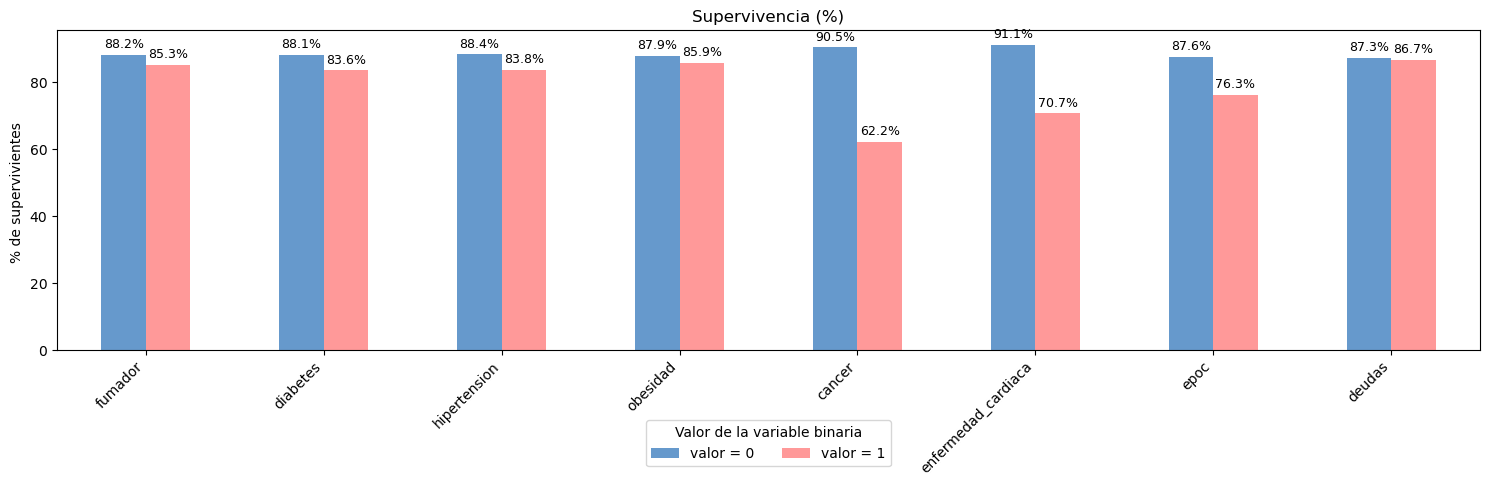

In [18]:
colores = ['#6699cc', '#ff9999']  

ax = porcentajes_df.plot(kind='bar', figsize=(15, 5), color=colores)
plt.title('Supervivencia (%)')
plt.ylabel('% de supervivientes ')

plt.xticks(rotation=45, ha='right')

for bars in ax.containers:
    for bar in bars:
        altura = bar.get_height()
        ax.annotate(f'{altura:.1f}%', 
                    xy=(bar.get_x() + bar.get_width() / 2, altura),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

plt.legend(['valor = 0', 'valor = 1'], title='Valor de la variable binaria',
           loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

plt.tight_layout()
plt.show()

**Conclusiones del análisis de variables binarias**

- Las variables **`cáncer`**, **`enfermedad_cardiaca`** y **`epoc`** muestran una **relación clara con menor probabilidad de supervivencia**. Los pacientes que presentan estas condiciones tienen un porcentaje de supervivencia significativamente menor que aquellos que no las presentan.

- El resto de variables binarias analizadas (**fumador, diabetes, hipertension, obesidad, deudas**) presentan **diferencias leves o prácticamente nulas** en los porcentajes de supervivencia entre sus valores 0 y 1. Por tanto, su impacto sobre la variable objetivo (`vive`) parece ser limitado en este conjunto de datos

##### Mutaciones

In [19]:
porcentajes_mut = {}
for col in mutaciones:
    total = df[col].value_counts().reindex([0, 1], fill_value=0)
    vive = df[df['vive'] == 1][col].value_counts().reindex([0, 1], fill_value=0)
    porcentaje = (vive / total * 100).fillna(0)
    porcentajes_mut[col] = porcentaje


porcentajes_mut_df = pd.DataFrame(porcentajes_mut).T
porcentajes_mut_df.columns = ['% vive (valor = 0)', '% vive (valor = 1)']
porcentajes_mut_df

,% vive (valor = 0),% vive (valor = 1)
mut_BRCA1,87.203960,86.840509
mut_TP53,87.155331,87.282195
mut_EGFR,87.187597,86.995691
mut_KRAS,87.150639,87.323383
mut_PIK3CA,87.129726,87.507401
mut_ALK,87.200821,86.883343
mut_BRAF,87.120151,87.597208


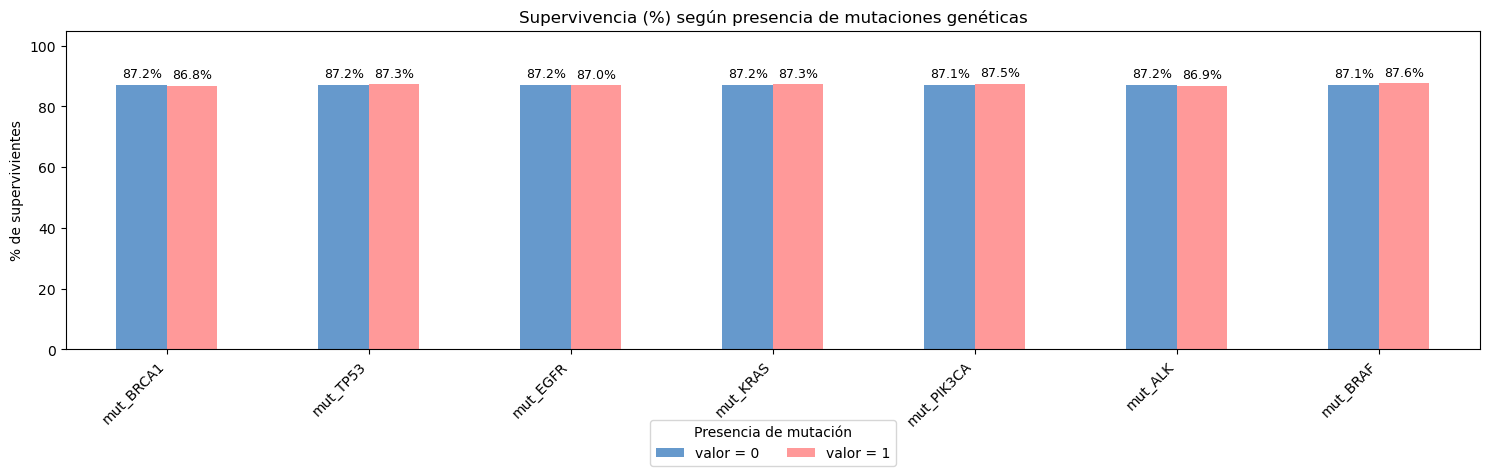

In [20]:
colores = ['#6699cc', '#ff9999']  # azul pastel y rojo claro
ax = porcentajes_mut_df.plot(kind='bar', figsize=(15, 5), color=colores)

# Etiquetas y estilo
plt.title('Supervivencia (%) según presencia de mutaciones genéticas')
plt.ylabel('% de supervivientes')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 105)

# Añadir etiquetas encima de cada barra
for bars in ax.containers:
    for bar in bars:
        altura = bar.get_height()
        ax.annotate(f'{altura:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, altura),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

# Leyenda debajo del gráfico
plt.legend(['valor = 0', 'valor = 1'], title='Presencia de mutación',
           loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

plt.tight_layout()
plt.show()

**Conclusión sobre las mutaciones genéticas**

Aunque todas las mutaciones analizadas están presentes en aproximadamente el 10% de los pacientes, los porcentajes de supervivencia (vive = 1) son muy **similares entre los pacientes con y sin cada mutación** 
 
Las diferencias observadas son generalmente inferiores al 1%, por lo que **no se aprecia una relación clara ni fuerte entre estas mutaciones y la supervivencia**.



### 3.2 Variables Numéricas

In [21]:
df[variables_numericas].head()

,edad,glucosa,colesterol,trigliceridos,hemoglobina,leucocitos,plaquetas,creatinina,ingresos_mensuales,gastos_salud
0,69,"108,81","226,16","161,07","13,24","6,12","258,09","0,97","2699,72",450
1,32,"74,23","148,89","110,77","13,68","6,97","278,32","0,85","3403,55",150
2,89,"88,61","177,53","91,93","12,76","7,54","245,35","1,59","2422,41",150
3,78,"90,92","203,97","121,79","12,95","8,56","245,11","1,26","1695,42",450
4,38,"69,17","154,33","78,34","12,34","8,2","234,44","0,88","1709,51",150


In [22]:
df[variables_numericas].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   edad                50000 non-null  int64 
 1   glucosa             50000 non-null  object
 2   colesterol          50000 non-null  object
 3   trigliceridos       50000 non-null  object
 4   hemoglobina         50000 non-null  object
 5   leucocitos          50000 non-null  object
 6   plaquetas           50000 non-null  object
 7   creatinina          50000 non-null  object
 8   ingresos_mensuales  50000 non-null  object
 9   gastos_salud        50000 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.8+ MB


Convertimos las columnas de tipo object a **float**, reemplazando la coma , por punto. 

In [23]:
cols_objeto = [
    'glucosa', 'colesterol', 'trigliceridos', 'hemoglobina',
    'leucocitos', 'plaquetas', 'creatinina', 'ingresos_mensuales'
]

for col in cols_objeto:
    df[col] = df[col].str.replace(',', '.').astype(float)

#### Matriz Correlación

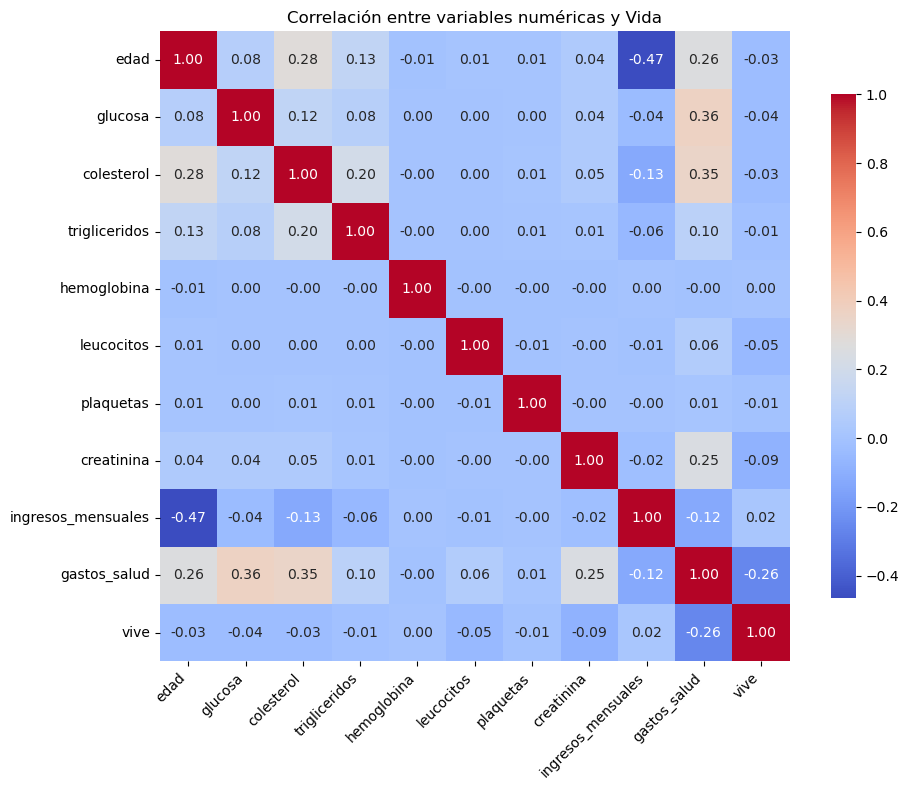

In [24]:
matriz_corr = df[variables_numericas + ['vive']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlación entre variables numéricas y Vida')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Relevancia Variable Numéricas en Vive**
- Ninguna variable numérica tiene una correlación fuerte con vive.
- La más destacada es **`gastos_salud`**, con una **correlación negativa moderada (-0.26)**: Un mayor gasto en salud se asocia con menor probabilidad de supervivencia, probablemente porque los pacientes más graves requieren mayor atención médica y recursos.

#### Outliers

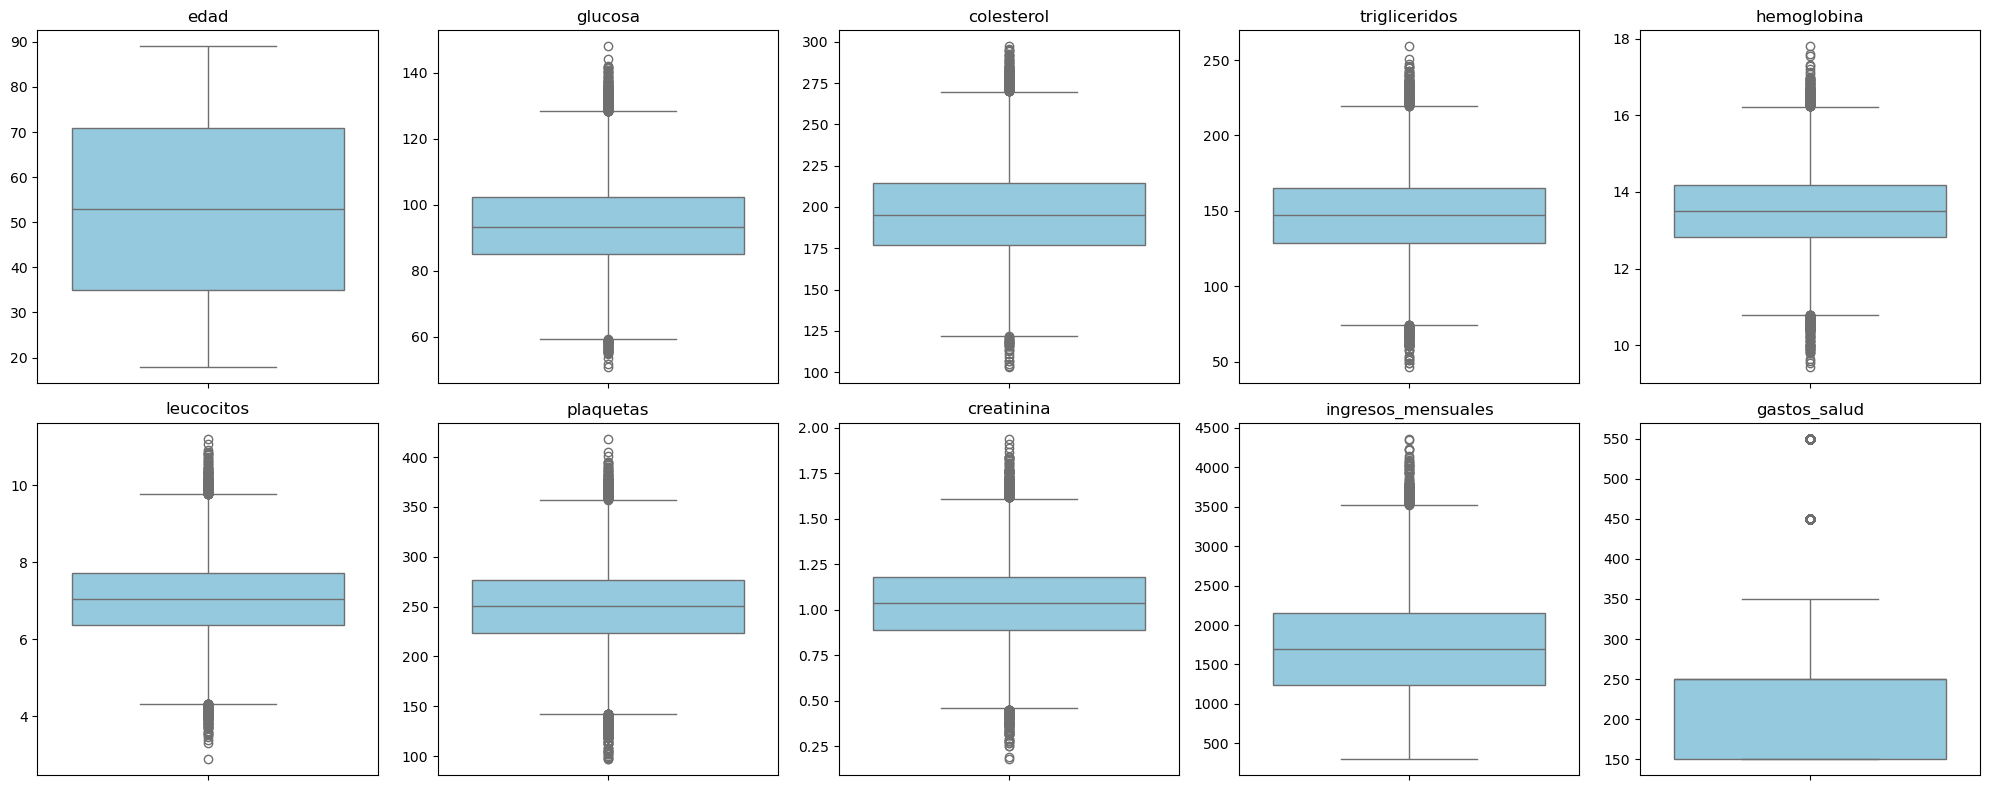

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
axes = axes.flatten()

for i, col in enumerate(variables_numericas):
    sns.boxplot(y=df[col], ax=axes[i], color="skyblue")
    axes[i].set_title(col)
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

**Eliminación Outliers**

Se ha eliminado del conjunto de datos aquellos registros cuyo valor en variables continuas se encontraba fuera del rango intercuartílico definido por los cuantiles 0.2 y 0.8, aplicando el criterio de Tukey.

- Total de registros eliminados: **228**
- Este número representa una proporción muy pequeña respecto al total de 50.000 registros, por lo que la pérdida de información es mínima.

In [26]:
def eliminar_outliers_por_columna(df, columnas, k=1.5, q1_val=0.2, q3_val=0.8):
    df_resultado = df.copy()
    eliminados_por_columna = {}
    filas_iniciales = df.shape[0]

    for col in columnas:
        q1 = df[col].quantile(q1_val)
        q3 = df[col].quantile(q3_val)
        iqr = q3 - q1
        lim_inf = q1 - k * iqr
        lim_sup = q3 + k * iqr


        mask_outlier = (df_resultado[col] < lim_inf) | (df_resultado[col] > lim_sup)
        eliminados = mask_outlier.sum()
        eliminados_por_columna[col] = eliminados


        df_resultado = df_resultado[~mask_outlier]

    filas_finales = df_resultado.shape[0]
    total_eliminados = filas_iniciales - filas_finales

    print(f"Antes: {df.shape}")
    print(f"Después: {df_resultado.shape}")
    print(f"Total de filas eliminadas: {total_eliminados}\n")

    print("Eliminados por columna:")
    for col, num in eliminados_por_columna.items():
        print(f"- {col}: {num} ")

    return df_resultado

df = eliminar_outliers_por_columna(df, variables_numericas)

Antes: (50000, 34)
Después: (49772, 34)
Total de filas eliminadas: 228

Eliminados por columna:
- edad: 0 
- glucosa: 21 
- colesterol: 15 
- trigliceridos: 27 
- hemoglobina: 39 
- leucocitos: 31 
- plaquetas: 41 
- creatinina: 37 
- ingresos_mensuales: 17 
- gastos_salud: 0 


### 3.3 Variables Categóricas

In [27]:
df[variables_categoricas].head()

,sexo,estado_civil,nivel_educativo,ocupacion,region,pais_nacimiento,actividad_fisica,tipo_empleo
0,F,Viudo,Secundaria,Empleado,Centro,Indonesia,Baja,Público
1,M,Soltero,Universitaria,Autónomo,Sur,Brazil,Moderada,Temporal
2,M,Viudo,Primaria,Desempleado,Norte,Saint Pierre and Miquelon,Baja,Desempleado
3,M,Viudo,Secundaria,Autónomo,Centro,Indonesia,Baja,Temporal
4,F,Soltero,Posgrado,Autónomo,Norte,Chile,Moderada,Temporal


**Valores Únicos por Variable**

In [28]:
variables_categoricas = [
    'sexo', 'estado_civil', 'nivel_educativo', 'ocupacion',
    'region', 'pais_nacimiento', 'actividad_fisica', 'tipo_empleo'
]
for col in variables_categoricas:
    print(f"{col}: {df[col].unique().tolist()}")

sexo: ['F', 'M']
estado_civil: ['Viudo', 'Soltero', 'Divorciado', 'Casado']
nivel_educativo: ['Secundaria', 'Universitaria', 'Primaria', 'Posgrado']
ocupacion: ['Empleado', 'Autónomo', 'Desempleado', 'Jubilado']
region: ['Centro', 'Sur', 'Norte', 'Oeste', 'Este']
pais_nacimiento: ['Indonesia', 'Brazil', 'Saint Pierre and Miquelon', 'Chile', 'Cuba', 'American Samoa', 'Montenegro', 'Cameroon', 'Barbados', 'Slovenia', 'Greenland', 'China', 'Somalia', 'Senegal', 'Korea', 'Palau', 'Swaziland', 'Antigua and Barbuda', 'Holy See (Vatican City State)', 'Netherlands', 'Equatorial Guinea', 'Samoa', 'Montserrat', 'San Marino', 'Cayman Islands', 'Malta', 'Tuvalu', 'Benin', 'United States of America', 'Bahamas', 'Cape Verde', 'Kazakhstan', 'French Guiana', 'Switzerland', "Cote d'Ivoire", 'Azerbaijan', 'Timor-Leste', 'Gibraltar', 'Vanuatu', 'Malawi', 'Saint Vincent and the Grenadines', 'Algeria', 'France', 'Honduras', 'Nigeria', 'Turkmenistan', 'Isle of Man', 'Fiji', 'Singapore', 'Kenya', 'Sweden', '

##### Pais Nacimiento

Para reducir la dimensionalidad y mejorar la interpretabilidad, se transformó esta variable en una nueva llamada `continente`, agrupando los países según su ubicación geográfica.

In [29]:
# Nombres Desactualizados
correcciones = {
    'Netherlands Antilles': 'Netherlands',
    'Cote d\'Ivoire': 'Ivory Coast',
    'Russian Federation': 'Russia',
    'Syrian Arab Republic': 'Syria',
    'Korea': 'South Korea',
    'Iran': 'Iran, Islamic Republic of',
    'Viet Nam': 'Vietnam',
    'Libyan Arab Jamahiriya': 'Libya',
}

df['pais_nacimiento'] = df['pais_nacimiento'].replace(correcciones)

In [30]:
paises_unicos = df['pais_nacimiento'].unique()
mapeo = {p: coco.convert(names=p, to='continent') for p in paises_unicos}

df['continente'] = df['pais_nacimiento'].map(mapeo)

In [31]:
df['continente'].unique()

array(['Asia', 'America', 'Oceania', 'Europe', 'Africa', 'Antarctica'],
      dtype=object)

In [32]:
# eliminamos pais nacimiento (no es necesario)
df = df.drop(columns=['pais_nacimiento'])

#### Label-Encoder

In [33]:
le = LabelEncoder()
df['sexo'] = le.fit_transform(df['sexo'])

#### OrdinalEncoder

In [34]:
cols_ordinales = ['nivel_educativo', 'actividad_fisica']
orden_ordinal = [
    ['Primaria', 'Secundaria', 'Universitaria', 'Posgrado'],  # nivel_educativo
    ['Baja', 'Moderada', 'Alta']                               # actividad_fisica
]
encoder_ordinal = OrdinalEncoder(categories=orden_ordinal)
df[cols_ordinales] = encoder_ordinal.fit_transform(df[cols_ordinales])
df[cols_ordinales] = df[cols_ordinales].astype(int)

In [35]:
diccionario_ordinal = {
    'nivel_educativo': dict(zip(orden_ordinal[0], range(len(orden_ordinal[0])))),
    'actividad_fisica': dict(zip(orden_ordinal[1], range(len(orden_ordinal[1]))))
}

# Mostrar el diccionario
for variable, codigos in diccionario_ordinal.items():
    print(f"\n{variable}:")
    for categoria, valor in codigos.items():
        print(f"  {categoria} → {valor}")


nivel_educativo:
  Primaria → 0
  Secundaria → 1
  Universitaria → 2
  Posgrado → 3

actividad_fisica:
  Baja → 0
  Moderada → 1
  Alta → 2


#### One-hot Encoder

In [36]:
columnas_onehot = ['estado_civil', 'ocupacion', 'region', 'tipo_empleo', 'continente']
df = pd.get_dummies(df, columns=columnas_onehot, drop_first=True, dtype=int)

## CSV final

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49772 entries, 0 to 49999
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   edad                     49772 non-null  int64  
 1   sexo                     49772 non-null  int64  
 2   nivel_educativo          49772 non-null  int64  
 3   fumador                  49772 non-null  int64  
 4   actividad_fisica         49772 non-null  int64  
 5   vive                     49772 non-null  int64  
 6   diabetes                 49772 non-null  int64  
 7   hipertension             49772 non-null  int64  
 8   obesidad                 49772 non-null  int64  
 9   cancer                   49772 non-null  int64  
 10  enfermedad_cardiaca      49772 non-null  int64  
 11  epoc                     49772 non-null  int64  
 12  glucosa                  49772 non-null  float64
 13  colesterol               49772 non-null  float64
 14  trigliceridos            49

In [39]:
df.shape

(49772, 48)